In [3]:
#!pip install google-play-scraper

In [1]:
from google_play_scraper import app
import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud, STOPWORDS
import numpy as np

# Crawling Data

In [21]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.tokopedia.tkpd',
    lang='id', 
    country='id', 
    sort=Sort.MOST_RELEVANT, 
    count=500, 
    filter_score_with=None 
)

In [22]:
df = pd.DataFrame(np.array(result),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8215db59-8f8f-43e3-a68c-d878c11c13bb,Firman Abd,https://play-lh.googleusercontent.com/a-/ALV-U...,Sejujurnya saya paling suka belanja di tokoped...,1,470,3.260.2,2024-04-24 19:43:24,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-04-24 20:00:06,3.260.2
1,459bb80e-cb0a-47ab-bab0-20f33873c2ce,Yudhi Bonge Sukajadi Gang Cendana,https://play-lh.googleusercontent.com/a/ACg8oc...,"Jika membuat aplikasi,apapun nama aplikasinya,...",5,7,3.260.2,2024-04-30 04:05:34,Terima kasih sudah mempercayakan Tokopedia seb...,2024-04-30 04:20:09,3.260.2
2,d3258d0b-7e6b-43cb-a667-e1e63edb4e30,aditya mahendradata,https://play-lh.googleusercontent.com/a-/ALV-U...,"Pakai toped sudah lama, baru akhir2 ini mengec...",1,322,3.260.2,2024-04-24 13:04:13,"Toppers, mohon maaf atas kendala yang kamu ala...",2024-04-24 13:20:03,3.260.2
3,132cfd11-926f-4e53-9c20-8e1d59e05886,Mr. R.A,https://play-lh.googleusercontent.com/a-/ALV-U...,buang aja kurir rekomendasi ID Express.. pengi...,1,6,3.260.2,2024-04-29 20:53:05,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-04-29 21:00:04,3.260.2
4,1249e838-21f6-4896-8180-51dc2ae6213d,Ibnu Ferry,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya kurang suka sama fitur kurir rekomendasin...,2,289,3.260.2,2024-04-19 16:33:59,"Toppers, mohon maaf atas kendala yang kamu ala...",2024-04-19 16:40:07,3.260.2


In [23]:
len(df.index) #count the number of data we got

500

In [24]:
data = df[['content']]
data.head()

,content
0,Sejujurnya saya paling suka belanja di tokoped...
1,"Jika membuat aplikasi,apapun nama aplikasinya,..."
2,"Pakai toped sudah lama, baru akhir2 ini mengec..."
3,buang aja kurir rekomendasi ID Express.. pengi...
4,Saya kurang suka sama fitur kurir rekomendasin...


# Data Understanding

In [27]:
# tipe data
data.dtypes

content    object
dtype: object

In [28]:
data.shape

(500, 1)

In [29]:
# cek missing value
data.isnull().sum()

content    0
dtype: int64

In [30]:
# cek data duplicate
data.duplicated().sum()

0

# Preprocessing Data

### mengubah text menjadi kecil

In [25]:
data['content'] = data['content'].str.lower()
data.head()

C:\Users\Selayanti\AppData\Local\Temp\ipykernel_1672\4107667387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].str.lower()


,content
0,sejujurnya saya paling suka belanja di tokoped...
1,"jika membuat aplikasi,apapun nama aplikasinya,..."
2,"pakai toped sudah lama, baru akhir2 ini mengec..."
3,buang aja kurir rekomendasi id express.. pengi...
4,saya kurang suka sama fitur kurir rekomendasin...


### 1. Normalisasi Kata

In [26]:
norm = {
    "yg": "yang", 
    "dg": "dengan", 
    "gue": "saya", 
    "akhir2": "akhir-akhir", 
    "tiba2": "tiba-tiba", 
    "bgt": "banget", 
    "kalo": "kalau", 
    "jgn": "jangan", 
    "krn": "karena", 
    "udh": "udah", 
    "tp": "tapi", 
    "shg": "sehingga", 
    "gk": "tidak",
    "lum": "belum"}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text
    
data['content'] = data['content'].apply(lambda x: normalisasi(x))
data.head()

C:\Users\Selayanti\AppData\Local\Temp\ipykernel_1672\1886960478.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].apply(lambda x: normalisasi(x))


,content
0,sejujurnya saya paling suka belanja di tokoped...
1,"jika membuat aplikasi,apapun nama aplikasinya,..."
2,"pakai toped sudah lama, baru akhir-akhir ini m..."
3,buang aja kurir rekomendasi id express.. pengi...
4,saya kurang suka sama fitur kurir rekomendasin...


## 2. Stopwords

In [31]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover (new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

data['content'] = data['content'].apply(lambda x: stopword(x))
data.head()

C:\Users\Selayanti\AppData\Local\Temp\ipykernel_1672\4152702488.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'] = data['content'].apply(lambda x: stopword(x))


,content
0,sejujurnya paling suka belanja tokopedia.. tam...
1,"membuat aplikasi,apapun nama aplikasinya,mau g..."
2,"pakai toped lama, baru akhir-akhir mengecewaka..."
3,buang aja kurir rekomendasi id express.. pengi...
4,"kurang suka sama fitur kurir rekomendasinya, o..."


## 3. Tokenize

In [32]:
tokenize = data['content'].apply(lambda x:x.split())
tokenize

0      [sejujurnya, paling, suka, belanja, tokopedia....
1      [membuat, aplikasi,apapun, nama, aplikasinya,m...
2      [pakai, toped, lama,, baru, akhir-akhir, menge...
3      [buang, aja, kurir, rekomendasi, id, express.....
4      [kurang, suka, sama, fitur, kurir, rekomendasi...
                             ...                        
495    [apasi, gak, jelas, banget, jelas", udah, aku,...
496    [kembalikan, mesin, pencarian, sesuai, kata, k...
497    [dong, perbaiki, pengirimanya,, gak, usah, lah...
498    [toko, the, best,, aplikasi, bagian, iklan,, i...
499    [ga, jelasnpembelian, dibatalkan, sistem, ,dui...
Name: content, Length: 500, dtype: object

## 4. Stemming

In [33]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(content):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in content:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenize.apply(stemming)

tokenized.to_csv('stemming_tokped.csv', index=False)
data_clean = pd.read_csv('stemming_tokped.csv', encoding='latin1')
data_clean.head()

jujur paling suka belanja tokopedia tampil menu enak lihat sangat ringan semua akan sia sia kita belanja barang kita beli lama datang beda aplikasi belah waktu 2 hari sampai laku coba satu toko sama tuju rumah saya sama untuk tokopedia coba kalian hapus kerja sama dengan expedisi expedisi yang lelet status jalan paket tidak update
buat aplikasi apa nama aplikasi mau gojek smule whatsap facebook kalau buat aplikasi mb kecil terus iklan tanpa ngelag lelet lot jika buat aplikasi kalau buat guna hp ram kecil ram besar contoh misal ram 512 ram ikut maaf tokopedia hapus gambar foto produk lot buka karena bayar bisa bayar tempat tidak bisa bayar lalu si kirim kurir maaf tokopedia uninstal
pakai toped lama baru akhir kecewa kurir rekomendasi sangat rekomended kelas toped rekomendasi expedisi lot koorperatif malah expedisinya tiba ganti pada barang sama hapus kurir rekomendasi yang tidak jelas itu
buang aja kurir rekomendasi id express kirim super lelet lot jujur di tracking barang nyata sampai

benar neng gw belanja tokped ekspedisi rekomendasi kurang baik masalah sama sebebelumnya saya selesai sendiri datang langsung pihak ekspedisi kalau di tambah ekspedisi untuk rekomendasi pihak tokopedia
sebebelum nya transaksi lancar baru kali kendala paket hilang udah aju barang hilang proses nya bulan bulan bebelum ada ambil dana refund gak besar nominal agak kecewa tangan nya lambat kes abai beli 
di-update appnya malah hasil search barang cari makin ngaco gak sesuai sering tampil hasil barang sponsor toko berlencan dll makin sulit cari jelek
kok sekarang app tokopedia makin jelas ya kok jd diem gin pas mau ngelacak barang pesan biasa lho biasa klo gw sen brg dr tokopedia selalu update kok status barang gw pesan kok sekarang berubah2 status kirim brg nya ya knp pihak tokopedia cmn diam doang ya padahal luar sana banyak org butuh bantu dr tokopedia sendiri mohon ditindaklanjuti supaya kita rasa aman kita belanja tokopedia ini sekian makas
selalu belanja tokopedia tapi semenjak rekomen

dong kalau pilih rekomendasi expedisi agak beneran dikit jangan amatir makin kesini harus makin cepat kirim ini malah makin lambat utama expedis id express tokopedia tanggu jawab paket rusak
aplikasi ribet payah lot tiap beli guna aplikasi pasti selalu kirim masalah barang 2 minggu lebih ada baik ada call center pesan komplain balas guna pesan tamplate
sampah expredisi jne nya udah lama gak pilih kasi seller ditokopedia jd korban kecewa beli kirim kok 6 hari paket diexpedisi lho bukan diseller order beberapa x gitu terus jne sampah lelet tokopedia terupdate tampil harga promo bukan harga asli udah mirip lazada malah pas karna semua voucher bs pakai pas chekout
kirim rekomendasi tokopedia rekomendasi proses kirim cukup lama pantas review barang datang untuk produk tapi ada nilai untuk delivery dr pihak tokopedia sadar kirim cukup buruk tambah tokopedia sedia layan tokopedia care hanya jalan sistem  robot jawab tidak sepenuh bantu keluh konsumen
please lah gratis ontidakir nya kalau kuri

beli barang laku bayar tapi di batal pihak alsan ada manipulasi bayar dan promo sesuai syarat laku lain kali kalau ga mau rugi atau gak niat kasih promo jangan bikin promo deh lagulaguan
cium cari untung besar beri nyaman prioritas guna guna rasa rugi satu kali 2 kali sering kali utama bagi kurir udah tau ekspedisi nya bobrok ajak kerja sama pada akhir nya jatuh rasa percaya pada pihak tokopedia saya sangat kecewa tidak bisa beri solusi padahal paket pada jual bbelum di ambil kurir sudah masuk 1 minggu gak jelas nya tokopedia smph
makin lama makin jelen pelayananya expds pilih apalagi ekspedisi sapx hapus sistem kirim lama banget lewat estimasi kirim tahu tahu estimasi panjang sama sistem 3 hari dari pertama di tentu tanya tokopedia care percuma gak solusi cuma jawab harap sabar di tunggu saja kalau masalah susah di hub cs nya beda jauh sama yang cs s
aplikasi gajelas bayar dapet promo otomatis batal sistem tokopedia kalau emang gamau ngasih diskon ngapain ngasih promo sampe 3 kali bay

pake voucher diskon 300rb an awal sebebelum co dpt diskon lalu lanjut selesai bayar briva bca sdh hasil malah dicancel otomatis tokped sendiri saran aja kalau memang voucher diskon tdk guna dari awal aja bisa buka sudah bayar langsung batal sistem kembali uang di tarik lama sekali bisa 1x24 jam masalah kemaren uang lebih 8jt beda sama toko oren kembali tdk 1 menit
super nyebelin sih ini order kabupaten sama order tgl 23 pesan diacc jual tgl 25 mepet waktu mau pas mau otomatis batal apk sekarang udah tgl 27 blm kabar gila sih satu kabupaten doang loh
kurir rekomendasi lelet kirim nya solusi beri muas andal bot chat estimasi kirim ubah makin lama waktu tanpa terang jelas
gw mesen barang tanggal 16 sampe hari ga nyampe nyampe estimasi kirim awal cuma sampe tanggal 23 tiba tiba ubah sampe tanggal 29 alas jelas konfirmasi pasti layan bantu ga jelas kelas tokopedia layan bantu cuma gantung sama bot sangat profesional banget
benar lama banget pakai tokopedia gopaylatter blokir sebab padahal p

isi top up update kartu emoney kenapa suka error ada program potong sering eror kenapa ada apa tokped ya
belanja sini sering banyak kendala saya beri bintang 1 saat bayar cepat proses kembali makan waktu 1bulan parah banget tokopedia parah asli
aplikasi makin lelet pilih jasa kirim jg lalau lama baru hari dua pesan direfund padahal dah mnunggu minggu sangat disayantidakan sekali karna dah bertahun2 andalin apkikasi sangat kecewa
kecewa banget sama tokopedia barang ga sampai2 sdh komplain lama banget proses refundnya masak udah 2minggu ga kabar sama sekali payah
sangat kecewa sekali tokopedia klaim udah hampir 2 bulan ada kembang beli sangat rugi sekali
mending tokopedia gak usah pake kurir sicepat udah belanja tokopedia puluh juta bahkan jadi member platinum paket gak dateng2 pake kurir sicepat harus ganti nama aja sicepat jadi silambat
alam buruk baru kali belanja ditokped mana salah pihak ekspedisi molor pengirkman dari tokopedia malah salah customer tidam feedback sama sekali eksped

rasa ganggu pop up advertising tokopedia masuk handphone saya sudah mati push notification tokopedia tetap muncul hp saya guna aktif tokopedia kalau jadi rasa ganggu tokopedia harus henti push iklan yang kayak software lain malah jadi bad mood tokopedia
baru order pertama  mana sudah transfer malah akun log out sendiri bebelum log in sampai ini padahal bukti ss beli ss bayar  masa iya gak data beli apa sudah tokopedia care kata data beli kan sudah tf  ni ada data transaksi brimo kak ada riwayat transaksi tf tidak ada dana balik kalau emang order batal
aplikasi otomatis hapus data transaksi telah kurun waktu tentu malu kalau lazada semua transaksi simpan rapi ada sistem hapus data transaksi otomatis jadi lazada kalau mau lihat histori transaksi saat bisa sedang tokopedia harus catat sendiri transaksi lama karena tokopedia ganas hapus data transaksi anda
paling neng belanja tokped discont voucher nya selalu banyak itu dulu sekarang pindah kompetitor sampe sekarang udah member platinum
si

pilih gratis ontidakir kur ga milih bisa kurir rekomendasi kurir rekomendasi ekspedisi pas kirim oper misal ekspedisi a tiba oper ekspedisi b ekspedisi 1 kalau udah a a jngn gonta ganti sebut menghabat estimasi kirim misal harus 3 hari jadi 4 hari bahkan lebih mohon lebih koreksi kena sebut
aplikasi tipu barang sen ga sampai uang gua hilang tapi pihak tokped ga respon sama sekali komplain gua sama sekali ga dengar aplikasi sampah
kont l sen aplikasi tokopedia banyak banget masalah udah kirim lama kata rekomendasi barang nyampe komplain biar dana balik lama lagi pokok serba lama sen akhir nyampe uninstall ni aplikasi mending pake lain rata2 3 hari nyampe
tokopedia fix filter produk baru filter sebut fungsi tampil produk baru mohon laku kece
trauma pakai kurir rekomendasi tokopedia benar sedang butuh barang beli malah paket nya inap gudang jne benar parah kerja sangat buruk beberapa hari paket bebelum antar ken emosi masih bulan puasa hapus fitur kurir rekomendasi kalau ini
pake apk buat

kelas tokopedia gratis ontidakir sen minggu kamis bebelum datang juga kalaj sama lazada layan sangat kecewa langgan baru kali beli online lama sampe lebih dri 4 hari
mau nambahin komplen kurir rekomendasi ga jelas ontidakir mahal malah barang ga sampai pas masuk komplain dana masalah cuman harga barang ontidakirnya masuk lho 1 9 juta uang harga ontidakir sgitu tokped yang nentukan harga lho andai bintang kasih tengah kasih tengah kalau keluh konsumen baik lah kecewa saya sama tokped cs nya jangan ai bikin pusing kembali dana ga jelas barang ga tau ilang mana
aplikasi belanja apa sedia kurir buruk se indonesia yah tokopedia lah mending hapus aja ni aplikasi kalau kirim nya lenceng estimasi untuk kurir nya moga sehat terus cepat pecattttt yang lihat komen tolong kasih aplikasi nya bintang 1 biar cepat sadar
modus tipu tarik konsumen beri promo dapat mengikutin syarat skk laku ketika guna akhir transaksi selesai malah promo batal pihak 2x kali alami rugi sini padahal guna akun lama aktif 

sangat kecewa solusi baik seperti maka jual rugi cemar nama baik nilai tidak jujur bayantidakan beli dapat barang harga murah tambah saldo beli naik banding apa ga jelas kirim bukti jual lentidakap tetap notifnya saldo kembali ke beli mudah kaya anak kecil pusat resolusi percaya 100 dengan beli benar tidak amanah jual apa pihak tokpednya
harus kurir rekomendasi kasih baik bukan buruk id express paling buruk mending blacklist barang gak antar sampe lewat estimasi tiba retur pemberitahuan buang2 waktu aja
setia ama toped 2016 akhir hapus juga gara-gara kurir rekomendasi si hancur e-commerce beli obat udah langgan tiap bulan biasa hari paling telat hari sampai kali 5 hari bebelum juga banyak di hand over kurir paket boikot jasa kirim sapx sial
kirim sering pindah in barang hilang customer servicenya super lama banget responnya serta solusi lama  gak selesai hampir 1 bulan  kecewa banget sama tokopedia sekarang
kirim lambat terus tokopedia sangat buruk sistem nya rugi konsumen penyelasaian

sya sbg kostumer lama toped utk beli sistem cod jangan batas jangan top up saldo tiap beli milik kriteria beda utk metode bayar  kan aplikasi belanja bebas bukan aplikasi kencan harus isi saldo cod  harus bayar bisa cod lalu utk sistem kirim harus guna peta geografis jd aneh fitur cod muncul g bsa mau beli bayar bikin sulit tokopedia malah lebih mudah aplikasi seblah paksa beli cod bayar slesai
lebih baik putus jasa jne tokopedia jasa kurir rusak citra tokopedia benar bener usaha tanggung jawab sistem terus terupdate otomatis panjang durasi kirim 15hari jg barang sampai sampai tokopedia kes bela jne pada nasabah sendiri kalau putus baru beri bintang lebih baik
tokopedia bagus saya barang jamin banyak promonya tapi kirim kadang lama bahkan serintidakali lebih batas estimasi kirim
jauh dibandintidakan shopee shopee byk voucher langgan sering kasih cashback besar beli pulsa bayar apa limit spinjam  paylater trs tambah langgan makin suka pke aplikasi limit nambah trs sampe bas juta  aku ga

udah parah emang sekarang tokped ngeri banget kurir kyk siput lama banget estimasi kapan kirim kapan udah gitu waktu etimasi habis tiba sistem ubah tambahin estimasi uninstal aja udah kali kali kyk gin kurir jauh banget sama toko oren
shipping super lelet buyer ga milih ekspedisi di toko oren co tanggal 3 4 24 jam 08 00 pagi tanggal 9 4 24 barang bebelum pelit sama diskon promo kurang tarik refund dana ga jelas 2x transaksi batal uang sudah bayar bebelum kembali ga gercep kalah jauh sama toko oren
sudah 5 tahun guna tokopedia banyak diskon barang bagus bagus layan muas fitur bayar lentidakap akses aplikasi bilang stabil cepat jarang sekali error paling suka dari segi kwalitas produk bagus juga fitur cukup mudah erti voucher diskon yang hampir tiap hari 
sudah liat nyata security aplikasi aman masa password bisa bocor dark web dapat informasi scan lewat gmail data hingga pasword aplikasi sudah sebar dark web sekarang ganti password nya sulit minta pilih validasi piliha validasinya tidak

tokped dong mau beli obat susah banget terlalu lama nunggu resep obat beli obat apotek kadang susah nyari stok pas betul online ada dicekout ribet banget mending kalau proses resep dokter cepat lama banget sih  ulang ulang otomatis keluar lagi tolong dong baik sistem tuh butuh beneran obat apotek konvensional langgan mahal harga makanya beli online
rekomendasi kurir nya kacau masa 1 minggu bebelum nyampai paket nya respon aju koplain sulit kira nya di ubah makin lama kalau rekonendasi kurir jangan j t bikin kurir sendiri toko belah
memang betul guna vocer free ontidakir kirim duhh sampe 9 hari dongg payah banget paket 2 hari stuckk tempat itu2 aja resi gajelas gabisa tracking laman jasa kirim
seller sama toko dia nya memang aneh kata kalau belanja tokopedia nggak seller nipu nyata ada ehh dari tokopedia sulit orang mau retur jelas2 seller salah bintang satu tidak untuk toko dia nol
buat tawar nya oke sih minus kirim nya kirim jne band aja gas udah 3 minggu ga nyampe ngestack situ mulu 

kurir rekomendasi nya lahhhh bener kerja masa kali mesen toko dia kirim nya lama banget kaya belah dong satset hal kirim ya toko dia baik sistem kirim nya
kirim super lama gaada chat customer service paket estimasi selalu pas gaada garansi nya hadehh beda sama toko belah kalah jauh
makin kesini malah makin error masa tiap klik link barang tokped selalu gak nyambung gak loading padahal tahun lalu bisa trus baru searching toko klik nama toko loaaaaading parah
kirim lama guna kurir rekomendasi telah lebih waktu malah enak rubah waktu estimasi mana ga ganti rugi kalau barang telat ga kaya aplikasi belah
padahl sudah beli d toko sama 2 x kok sen dua paket aku nyasr sen paket tgl 30 maret sampai tgl 7 april bebelum dtng padahal niat sebebelum lebaran udah aku pakai tolong admin saya beli barngnya kurang dan merrka cuma mau ganti uang gak mau kirim ulang barang kode promo pakai balik lah salah pihak toko bukan beli aku kasih bntang 1 kecewa berat padahal mau aku pakai sebebelum lebaran
layan 

toko the best aplikasi bagi iklan iklan sangat kreatif selalu ikut trend love banget sama tokopedia 
ga jelasnpembelian batal sistem duit nya udah masuk pihak tokopedia aju refund kata nya 1hari lebih 1 hari tokopedia melingdana orang no recomnd 


,content
0,jujur paling suka belanja tokopedia tampil men...
1,buat aplikasi apa nama aplikasi mau gojek smul...
2,pakai toped lama baru akhir kecewa kurir rekom...
3,buang aja kurir rekomendasi id express kirim s...
4,kurang suka sama fitur kurir rekomendasi otoma...


In [35]:
from googletrans import Translator

In [36]:
def convert_eng(data):
    translator = Translator()
    return translator.translate(data, dest='en').text

data['content_ing'] = data['content'].apply(convert_eng)
data

C:\Users\Selayanti\AppData\Local\Temp\ipykernel_1672\2069662874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content_ing'] = data['content'].apply(convert_eng)


,content,content_ing
0,sejujurnya paling suka belanja tokopedia.. tam...,To be honest the most like shopping to Tokoped...
1,"membuat aplikasi,apapun nama aplikasinya,mau g...","Make an application, whatever the name of the ..."
2,"pakai toped lama, baru akhir-akhir mengecewaka...","Use a long time, only lately disappointing the..."
3,buang aja kurir rekomendasi id express.. pengi...,Just throw away the courier recommendation ID ...
4,"kurang suka sama fitur kurir rekomendasinya, o...",Do not like the recommendation courier feature...
...,...,...
495,"apasi gak jelas banget jelas"" udah aku bayar t...","Apasi is not very clear ""I already paid the tr..."
496,kembalikan mesin pencarian sesuai kata kunci s...,Return the search engine according to the keyw...
497,"dong perbaiki pengirimanya, gak usah lah kerja...","please fix the delivery, no need to work toget..."
498,"toko the best, aplikasi bagian iklan, iklannya...","The best shop, ad application, the ad is very ..."


In [42]:
data.to_csv('translate_tokped.csv', index=False)

# Klasifikasi Menggunakan TexBlob

## Labelling 

In [43]:
translate = pd.read_csv("translate_tokped.csv")
translate

,content,content_ing
0,sejujurnya paling suka belanja tokopedia.. tam...,To be honest the most like shopping to Tokoped...
1,"membuat aplikasi,apapun nama aplikasinya,mau g...","Make an application, whatever the name of the ..."
2,"pakai toped lama, baru akhir-akhir mengecewaka...","Use a long time, only lately disappointing the..."
3,buang aja kurir rekomendasi id express.. pengi...,Just throw away the courier recommendation ID ...
4,"kurang suka sama fitur kurir rekomendasinya, o...",Do not like the recommendation courier feature...
...,...,...
495,"apasi gak jelas banget jelas"" udah aku bayar t...","Apasi is not very clear ""I already paid the tr..."
496,kembalikan mesin pencarian sesuai kata kunci s...,Return the search engine according to the keyw...
497,"dong perbaiki pengirimanya, gak usah lah kerja...","please fix the delivery, no need to work toget..."
498,"toko the best, aplikasi bagian iklan, iklannya...","The best shop, ad application, the ad is very ..."


In [44]:
translate.shape

(500, 2)

In [45]:
# stemming variabel 'content_ing'

from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming_data(x):
    return ps.stem(x)

translate['content_ing'] = translate['content_ing'].apply(stemming_data)

In [46]:
from textblob import TextBlob

data_toped = translate['content_ing'].tolist()
polaritas = 0

status = []
sum_positif = sum_negatif = sum_netral = total = 0

for i, toped in enumerate(data_toped):
    if not isinstance(toped, str) or pd.isna(toped):
        continue

    analysis = TextBlob(toped)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        sum_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        sum_netral += 1
        status.append('Netral')
    else:
        sum_negatif += 1
        status.append('Negatif')

    total += 1

print(f'Hasil Analisis Data:\nPositif = {sum_positif}\nNetral = {sum_netral}\nNegatif = {sum_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 254
Netral = 18
Negatif = 228

Total Data : 500


In [47]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Nilai sentimen diintepretasikan sebagai positif, negatif, atau netral
    if analysis.sentiment.polarity > 0:
        return 'POSITIF'
    elif analysis.sentiment.polarity == 0:
        return 'NETRAL'
    else:
        return 'NEGATIF'

# Menambahkan kolom sentimen ke dalam DataFrame
translate['klasifikasi'] = translate['content_ing'].apply(analyze_sentiment)

# Menampilkan hasil
translate

,content,content_ing,klasifikasi
0,sejujurnya paling suka belanja tokopedia.. tam...,to be honest the most like shopping to tokoped...,POSITIF
1,"membuat aplikasi,apapun nama aplikasinya,mau g...","make an application, whatever the name of the ...",NEGATIF
2,"pakai toped lama, baru akhir-akhir mengecewaka...","use a long time, only lately disappointing the...",NEGATIF
3,buang aja kurir rekomendasi id express.. pengi...,just throw away the courier recommendation id ...,POSITIF
4,"kurang suka sama fitur kurir rekomendasinya, o...",do not like the recommendation courier feature...,POSITIF
...,...,...,...
495,"apasi gak jelas banget jelas"" udah aku bayar t...","apasi is not very clear ""i already paid the tr...",POSITIF
496,kembalikan mesin pencarian sesuai kata kunci s...,return the search engine according to the keyw...,NETRAL
497,"dong perbaiki pengirimanya, gak usah lah kerja...","please fix the delivery, no need to work toget...",POSITIF
498,"toko the best, aplikasi bagian iklan, iklannya...","the best shop, ad application, the ad is very ...",POSITIF


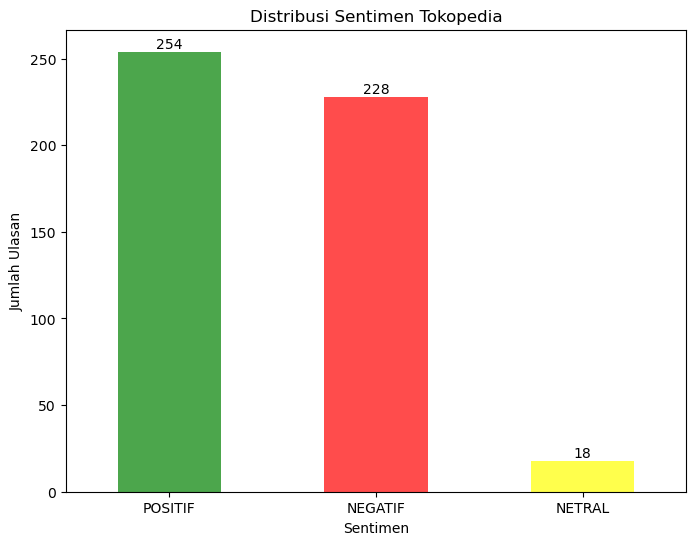

In [48]:
# distribusi sentimen dengan bar chart

sentimen_counts = translate['klasifikasi'].value_counts()

plt.figure(figsize=(8, 6))
ax = sentimen_counts.plot(kind='bar', color=['green', 'red', 'yellow'], alpha=0.7)
plt.title('Distribusi Sentimen Tokopedia')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)

# Menambahkan label count di atas setiap bar
for i in ax.patches:
    plt.text(i.get_x() + i.get_width()/2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.show()


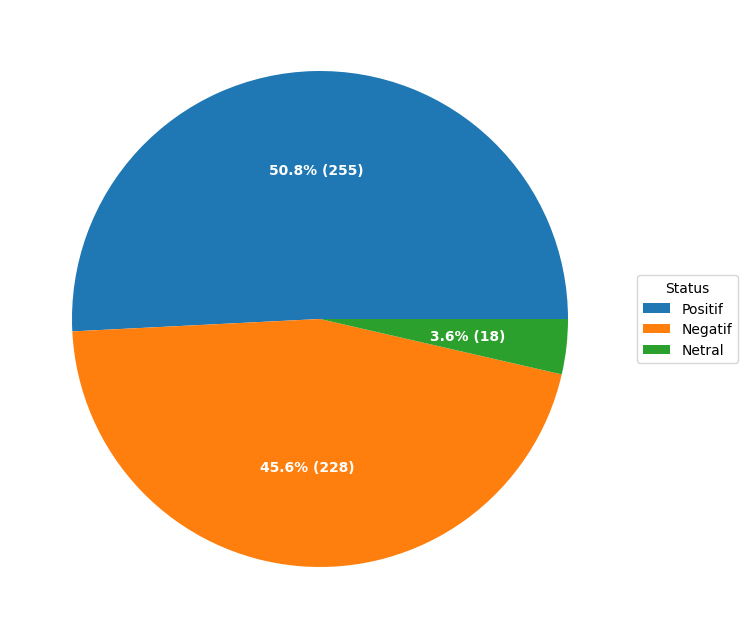

In [49]:
# presentase sentimen dengan piechart

def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]
    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()
    
label = ['Positif', 'Negatif', 'Netral']
count_data = [sum_positif+1, sum_negatif+1, sum_netral]

show_pie(label, count_data, "Status")

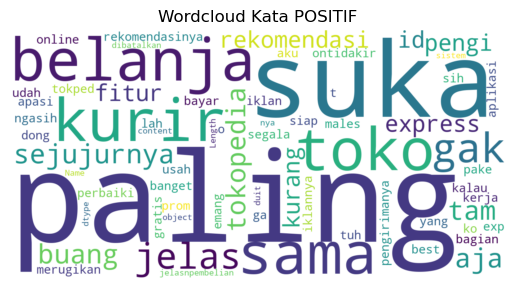

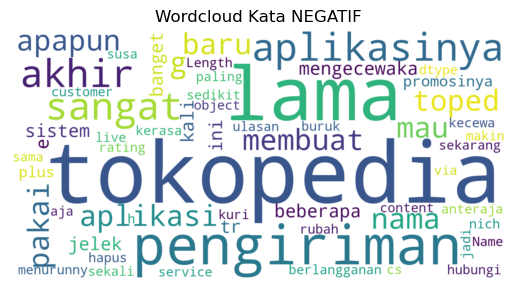

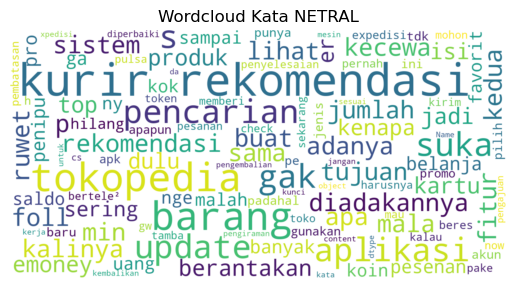

In [50]:
# wordcloud tiap sentimen

def show_wordcloud(sentiment, text):
    wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(text))
    plt.figure()
    plt.title(sentiment)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

positive_ = translate['content'][translate['klasifikasi']== 'POSITIF']
negative_ = translate['content'][translate['klasifikasi']== 'NEGATIF']
neutral_ = translate['content'][translate['klasifikasi']== 'NETRAL']

show_wordcloud("Wordcloud Kata POSITIF", positive_)
show_wordcloud("Wordcloud Kata NEGATIF", negative_)
show_wordcloud("Wordcloud Kata NETRAL", neutral_)

# Analisis Sentimen menggunakan Naive Bayes Classifier

## Membagi data menjadi Data Train dan Data Test 

In [51]:
dataset = translate.drop(['content'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [52]:
import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
      set_positif.append(n)
    elif(n[1] == 'Negatif'):
      set_negatif.append(n)
    else:
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [53]:
from textblob.classifiers import NaiveBayesClassifier
from sklearn.metrics import classification_report

cl = NaiveBayesClassifier(train_set)

# Membuat daftar prediksi untuk dataset
predictions = [cl.classify(row[0]) for row in dataset]
# Mendefinisikan daftar target yang sebenarnya dari dataset
true_labels = [row[1] for row in dataset]
# Menghasilkan classification report
report = classification_report(true_labels, predictions)

print('Akurasi Test:', cl.accuracy(dataset))
print(report)

C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Selayanti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Akurasi Test: 0.814
              precision    recall  f1-score   support

     NEGATIF       0.78      0.87      0.82       228
      NETRAL       0.00      0.00      0.00        18
     POSITIF       0.85      0.82      0.83       254

    accuracy                           0.81       500
   macro avg       0.54      0.56      0.55       500
weighted avg       0.79      0.81      0.80       500



In [54]:
data_lazada = translate['content_ing'].tolist()
polaritas = 0

status_naive = []
total_positif = total_negatif = total_netral = total = 0

for i, lazada in enumerate(data_lazada):
    if not isinstance(lazada, str) or pd.isna(lazada):
        continue

    analysis = TextBlob(lazada, classifier=cl)
    
    if analysis.classify() == 'POSITIF':
        total_positif += 1
        status_naive.append('POSITIF')
    elif analysis.classify() == 'NETRAL':
        total_netral += 1
        status_naive.append('NETRAL')
    else:
        total_negatif += 1
        status_naive.append('NEGATIF')

    total += 1

print(f'Hasil Analisis Data Naive Bayes Classifier:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data Naive Bayes Classifier:
Positif = 245
Netral = 0
Negatif = 255

Total Data : 500


In [55]:
status_naive = pd.DataFrame({'klasifikasi_naive': status_naive})
translate['klasifikasi_naive'] = status_naive
translate.tail()

,content,content_ing,klasifikasi,klasifikasi_naive
495,"apasi gak jelas banget jelas"" udah aku bayar t...","apasi is not very clear ""i already paid the tr...",POSITIF,POSITIF
496,kembalikan mesin pencarian sesuai kata kunci s...,return the search engine according to the keyw...,NETRAL,POSITIF
497,"dong perbaiki pengirimanya, gak usah lah kerja...","please fix the delivery, no need to work toget...",POSITIF,POSITIF
498,"toko the best, aplikasi bagian iklan, iklannya...","the best shop, ad application, the ad is very ...",POSITIF,POSITIF
499,"ga jelasnpembelian dibatalkan sistem ,duit nya...",it is unclear the purchase was canceled by the...,POSITIF,POSITIF


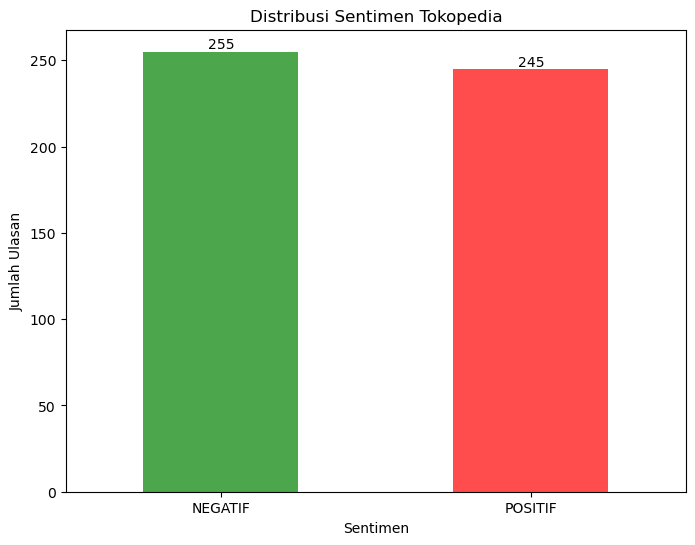

In [56]:
# distribusi sentimen dengan bar chart

sentimen_counts = translate['klasifikasi_naive'].value_counts()

plt.figure(figsize=(8, 6))
ax = sentimen_counts.plot(kind='bar', color=['green', 'red', 'yellow'], alpha=0.7)
plt.title('Distribusi Sentimen Tokopedia')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)

# Menambahkan label count di atas setiap bar
for i in ax.patches:
    plt.text(i.get_x() + i.get_width()/2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.show()

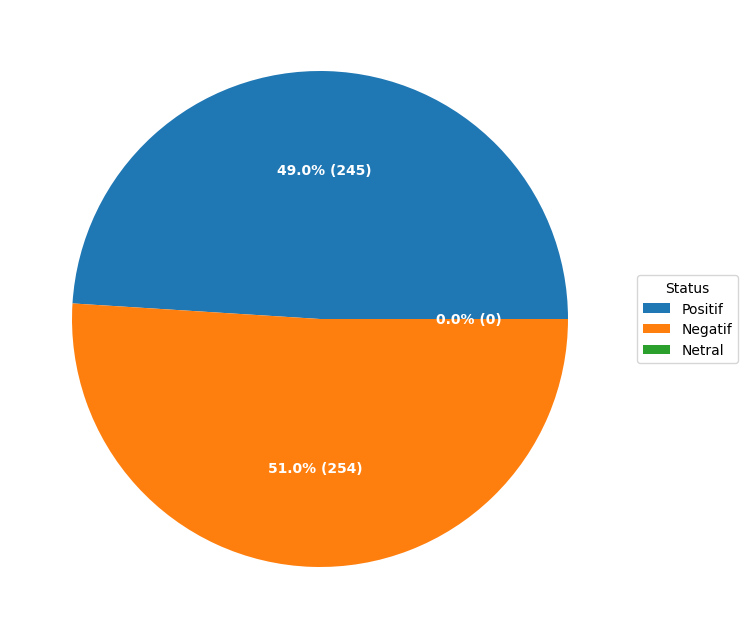

In [58]:
# presentase sentimen dengan piechart

label = ['Positif', 'Negatif', 'Netral']
count_data = [total_positif, total_negatif, total_netral]

show_pie(label, count_data, "Status")

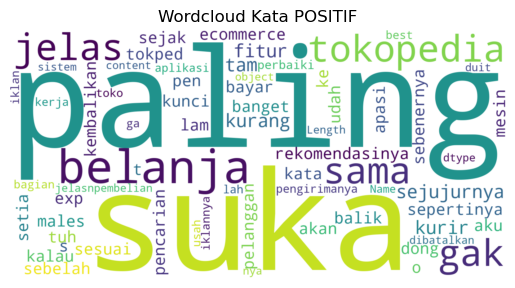

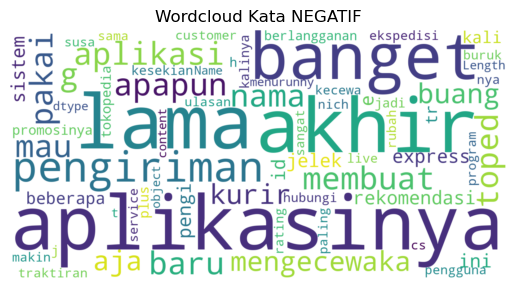

In [61]:
# wordcloud tiap sentimen

def show_wordcloud(sentiment, text):
    wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(text))
    plt.figure()
    plt.title(sentiment)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

positive_ = translate['content'][translate['klasifikasi_naive']== 'POSITIF']
negative_ = translate['content'][translate['klasifikasi_naive']== 'NEGATIF']

show_wordcloud("Wordcloud Kata POSITIF", positive_)
show_wordcloud("Wordcloud Kata NEGATIF", negative_)

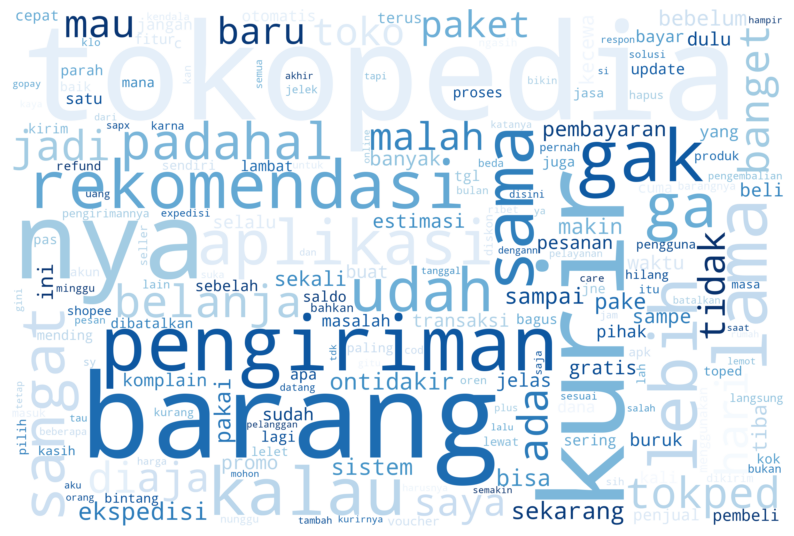

In [62]:
# wordcloud semua data

def plot_cloud(wordcloud):
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
all_words = ''.join([content for content in data['content']])

wordcloud = WordCloud(
    width = 3000,
    height =2000,
    random_state = 3,
    background_color = 'white',
    colormap = 'Blues_r',
    collocations = False,
    stopwords = STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)